In [2]:
# Imports required for project
import matplotlib.pyplot as plt
import matplotlib as mlb
import pandas as pd
from ast import literal_eval
import numpy as np

In [3]:
# Read csv file.
csv_data = pd.read_csv('papers_data.csv', encoding='utf-8')

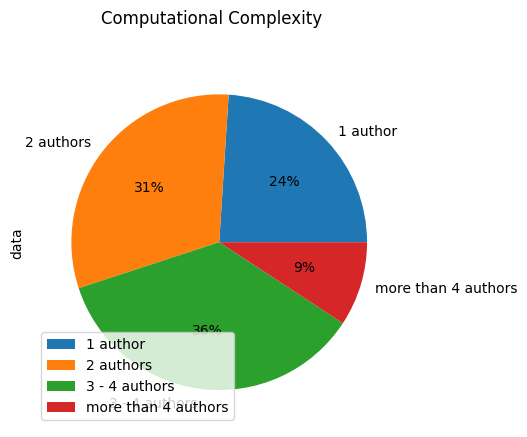

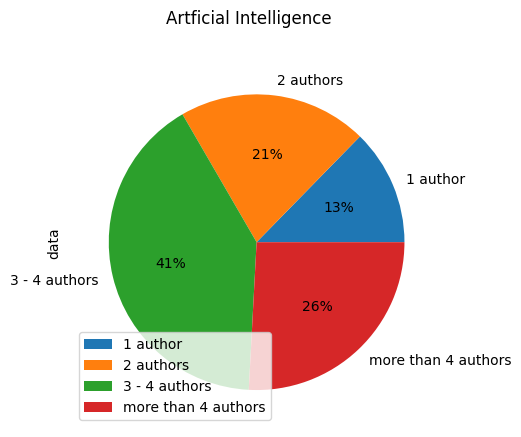

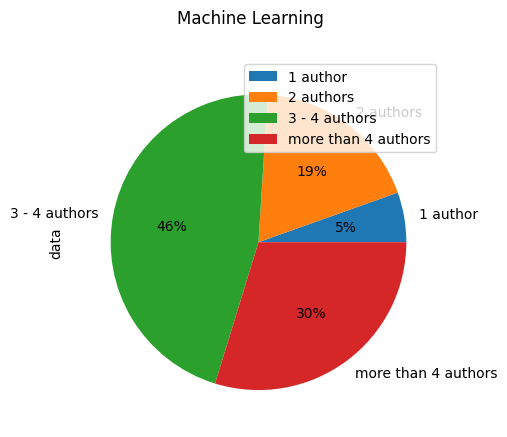

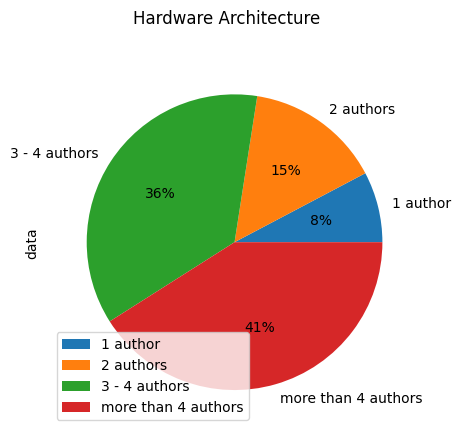

In [13]:
# Segregate the arxiv data based on primary category
cc_data = csv_data[csv_data['primary_category']=='cs.CC']  # Computational Complexity dataframe
ai_data  = csv_data[csv_data['primary_category']=='cs.AI'] # Artficial Intelligence dataframe
ml_data         = csv_data[csv_data['primary_category']=='cs.LG'] # Machine Learning dataframe
ha_data    = csv_data[csv_data['primary_category']=='cs.AR'] # Hardware Architecture dataframe


"""
Add the dataframes of all the segragated primary categories to dictionary
"""
df_dict = {'Computational Complexity': cc_data,
'Artficial Intelligence': ai_data,
'Machine Learning': ml_data,
'Hardware Architecture': ha_data}

# Interate through dictionary items & reuse the piechart plot code 
for df_name,rdf in df_dict.items():
    authors = rdf['authors'].values
    dict = {}
    temp_list = []
    # To count number of authors in the 'authors' array and add to temp list
    for i in authors:
        try:
            # print(i, len(literal_eval(i)))
            temp_list.append(len(literal_eval(i))) # literal_eval() - The string or node provided may only consist of the following Python literal structures
        except Exception as err:
            # print('Error at :', i)
            pass

    df = pd.DataFrame(temp_list, columns=['data'])
    cut_edges = np.array([-np.inf, 1, 2, 4, np.inf])
    # 1 2 3-4 >4 segregation based on requirement
    labels = ['1 author', '2 authors', '3 - 4 authors', 'more than 4 authors']
    # To segment and sort data values into bins
    df['category'] = pd.cut(df['data'], cut_edges, labels=labels)
    # Set the DataFrame index using existing columns.
    df.set_index('category', append=False, inplace=True)
    # Plot the piechart based on number of authors.
    df.groupby(level='category').count().plot(kind='pie',subplots=True, autopct='%1.0f%%',title=df_name, legend=True)


